### Exercise
1 - Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features.  Drop other two features for simplicity. <br>
2 - Figure out if any preprocessing such as scaling would help here <br>
3 - Draw elbow plot and from that figure out optimal value of k <br>

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib

#### Explaring the data

In [2]:
iris_data = load_iris()
dir(iris_data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


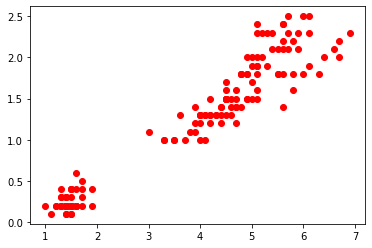

In [7]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color='red')

#### plotting the elbow to see how many clusters we need

In [11]:
X = df[['petal length (cm)', 'petal width (cm)']] # in Unsuprvised data we had only the features without the target variable

In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

C:\Users\eyada\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


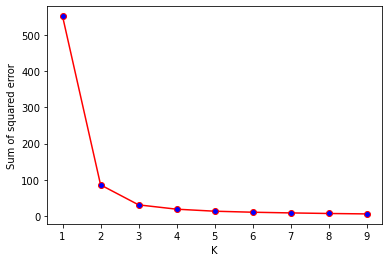

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse, 'r-o', markerfacecolor = 'blue')
plt.show()

from the elbow plot we can conclude that our clustring would be = 3

#### Using clustring technique to split the features into groups

In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X)

In [19]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### let's take the data and convert it into Supervised Data (labeld data)

In [20]:
df['Cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [21]:
df.Cluster.unique()

array([0, 2, 1])

#### Visulaize after clustring the data

In [22]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

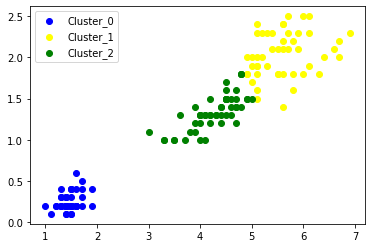

In [24]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], c='blue', label='Cluster_0')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], c='yellow', label='Cluster_1')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], c='green', label='Cluster_2')
plt.legend()
plt.show()

In [25]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

#### Visuliaze the centroids

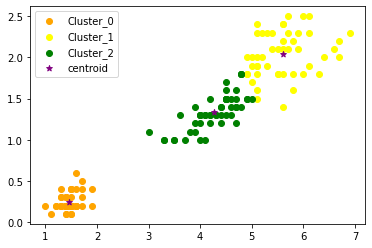

In [27]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], c='orange', label='Cluster_0')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], c='yellow', label='Cluster_1')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], c='green', label='Cluster_2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()

#### let's build aSVC model train the data after converting it to supervised (labeled) data

In [31]:
df.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [34]:
X = df.drop('Cluster', axis=1)
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [35]:
y_pred = df.Cluster

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y_pred, test_size=0.25)

In [60]:
model = SVC(kernel='linear', gamma=0.01, C=0.1)

In [61]:
model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.01, kernel='linear')

In [62]:
model.score(X_test, y_test)

1.0

#### Save the model

In [64]:
joblib.dump(model, 'Iris flower prediction')

['Iris flower prediction']

#### Load the model

In [65]:
mj = joblib.load('Iris flower prediction')

#### using the model after loading it

In [66]:
mj.predict(X_test)

array([2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2])